In [1]:
from getpass import getpass
import pandas as pd
from sqlalchemy import create_engine

import fim

import matplotlib.pyplot as plt

In [2]:
# get secrets from the user
user=getpass('PostgreSQL username?')
password=getpass('PostgreSQL password?')
host=getpass('PostgreSQL host?')

# create connection string for postgres
engine = create_engine('postgresql://{}:{}@{}:5432/postgres'.format(user, password, host))

# load postgres table
df = pd.read_sql_table('yelp_business_clean', con=engine) 

PostgreSQL username?········
PostgreSQL password?········
PostgreSQL host?········


In [3]:
# inspect data
df.head()

,address1,address2,address3,categories,city,id,latitude,longitude,name,phone,price,rating,review_count,state,zip_code
0,257 Hanover St,,,"{bakeries,coffee,desserts}",Boston,54ElwAyN-o8e4uvOkC85hw,42.363240,-71.054740,Modern Pastry Shop,+16175233783,NaN,4.0,1594,MA,02113
1,12 Farnsworth St,,,"{bakeries,coffee,sandwiches}",Boston,-5gWvrcKOPmhlcZju3tpbw,42.351370,-71.048810,Flour Bakery + Café,+16173384333,NaN,4.5,999,MA,02210
2,323 Hanover St,,,"{italian,seafood,coffee}",Boston,uXOVFQraz1va1TrtgiqYTg,42.364060,-71.053970,The Daily Catch,+16175238567,NaN,4.0,1396,MA,02113
3,165 Tremont St,,,{coffee},Boston,YPMMkUSAvZX4K-JsUbREyQ,42.353900,-71.063720,Thinking Cup,+16174825555,NaN,4.0,1048,MA,02111
4,1595 Washington St,,,"{bakeries,coffee,sandwiches}",Boston,SvSjcS0jjnFwl27RMnrkQQ,42.338443,-71.074548,Flour Bakery & Cafe,+16172674300,NaN,4.0,826,MA,02118


In [4]:
# put categories into a list
categories = df['categories'].tolist()

# prepare categories for market basket analysis
items = []
for line in categories:
    row = line.replace('{', '').replace('}', '').split(',')
    items.append(set(row))
    
# inspect cleaned up items
items[:5]

[{'bakeries', 'coffee', 'desserts'},
 {'bakeries', 'coffee', 'sandwiches'},
 {'coffee', 'italian', 'seafood'},
 {'coffee'},
 {'bakeries', 'coffee', 'sandwiches'}]

In [5]:
# identify patterns
patterns = fim.fpgrowth(items, zmin=2, supp=1)

# sort by number of times pattern occurs
patterns.sort(key=lambda x: x[1], reverse=True)

# insoect patterns foudn
patterns[:5]

[(('donuts', 'coffee'), 323),
 (('sandwiches', 'coffee'), 103),
 (('breakfast_brunch', 'coffee'), 100),
 (('bakeries', 'coffee'), 70),
 (('convenience', 'coffee'), 54)]

In [6]:
# clean up patterns and counts
x = []
cnt = []
for line in patterns:
    x.append(';'.join(line[0]))
    cnt.append(line[1])
    
# inspect cleaned patterns
print(list(zip(x[:5], cnt[:5])))

[('donuts;coffee', 323), ('sandwiches;coffee', 103), ('breakfast_brunch;coffee', 100), ('bakeries;coffee', 70), ('convenience;coffee', 54)]


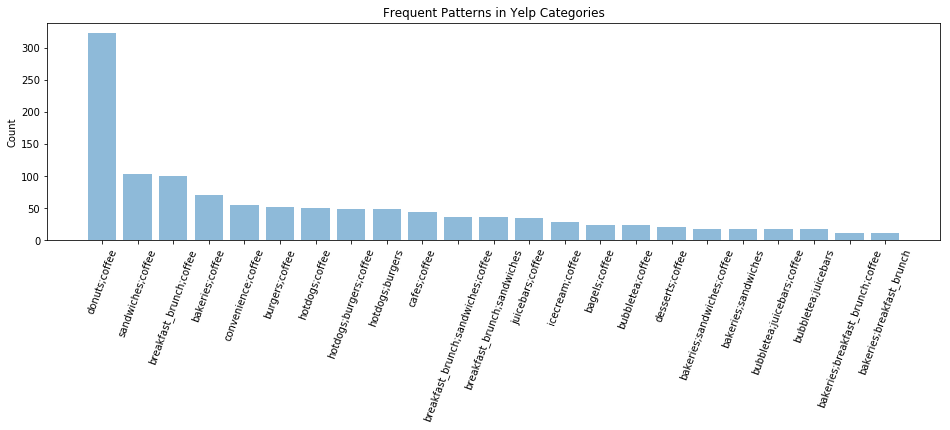

In [7]:
# plot patterns and count
plt.figure(figsize=(16,4))
plt.bar(x, cnt, align='center', alpha=0.5)
plt.ylabel('Count')
plt.title('Frequent Patterns in Yelp Categories')
plt.xticks(rotation=70)
plt.show()